# Data Storytelling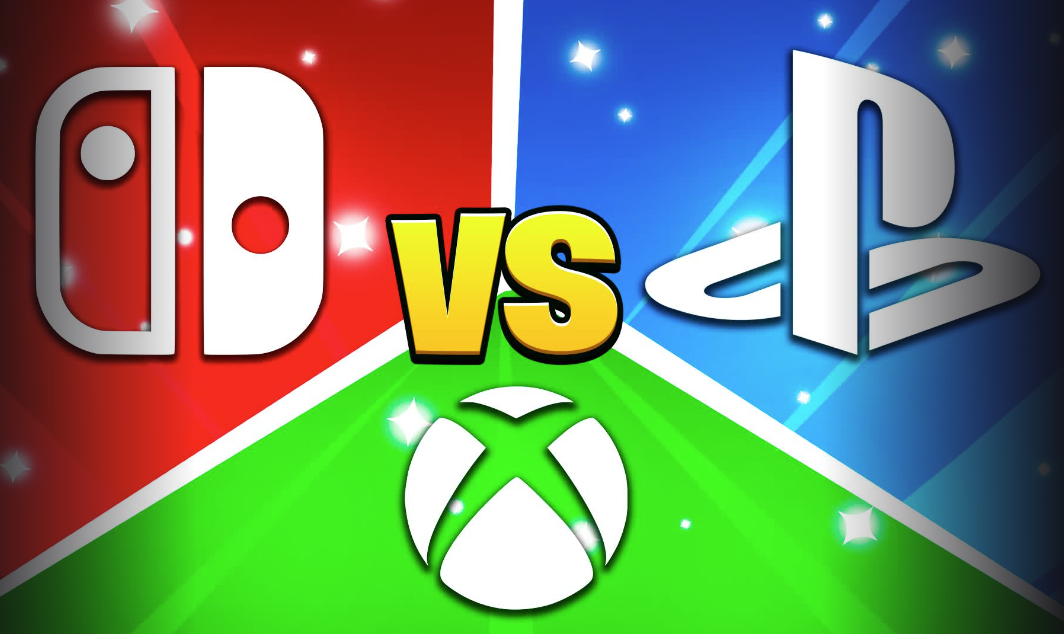 Entregable
## Curso Data science Coder House
## Comision: 46300
## Tutor: Giuliano Crenna


## Jonathan Vasquez

# Introduccion
***
### **Contexto Social:** En el dinámico escenario de la industria global de videojuegos, surgen interrogantes cruciales sobre la conexión entre la popularidad de un juego en distintos países y sus ventas totales, el impacto del género en el desempeño comercial y la estabilidad en los resultados financieros de los desarrolladores. ¿Cómo se traduce la aceptación local en un aumento de las ventas? ¿Existen géneros que consistentemente lideran en términos de rendimiento financiero? ¿Hay desarrolladores que mantienen un liderazgo constante en ventas? Este análisis se adentrará en estas cuestiones fundamentales, proporcionando perspectivas esenciales para comprender y anticipar las dinámicas de la industria del entretenimiento interactivo.

### **Contexto Analitico:** El siguiente Dataset con el cual se va a trabajar se encontro en la pagina de Kaggle.com que contiene los datos necesarios para poder llevar a cabo nuestro trabajo la cual contiene las siguientes columnas.

-Name: Nombre del Video Juego

-Platform: Plataforma de creación

-Year_of_Release: Año de Lanzamiento.

-Genre: Genero del Video Juego.

-Publisher: Empresa Creadora del Video Juego

-NA_Sales: Ventas en EEUU

-EU_Sales: Ventas en Europa

-JP_Sales: Ventas en Japon

-Other_Sales: Otras Ventas en el mundo.

-Global_Sales: Total de ventas

-Critic_Score: Es la evaluación agregada de un juego realizada por críticos profesionales y expertos en la industria del juego

-Critic_Count: La cantidad de criticos que utilizados para obtener el critic_Score

-User_Score: Es la puntuacion otorgada por los criticos.

-User_Count: Numero de usuario que proporcionaron el User_Score

-Developer: Responsable de crear el juego


**Tareas a realizar:**

-Extraer los datos y posteriormente purgarlos.














# Definición del Objetivo
***
### Cuales son las principales caracteristicas de los juegos mas famosos?

### Como se relaciona el score asignado al juego con respecto a sus ventas?

#Preguntas de interes
***
### 1. La Popularidad de un Video Juego en ciertos paises esta relacionada con las ventas en esas regiones, que pais consume mas Video Juegos?

### 2. Cual es el Top 5 de las Consolas que mas usuarios obtuvieron?

### 3. En cual década se han vendido mas video juegos?

### 4. Cual es el género mas vendido?


In [ ]:
## Primero llamamos a las librerias.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive ## hay que hacerlo para poder importar archivos del drive
drive.mount('/content/drive')


# Cargamos el archivo

ruta_archivo = ("/content/drive/MyDrive/DATA SCIENCE/Data science 2024 entregables/Segundo_2024/Copia de Copia de Video_Games.csv")

df = pd.read_csv (ruta_archivo)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


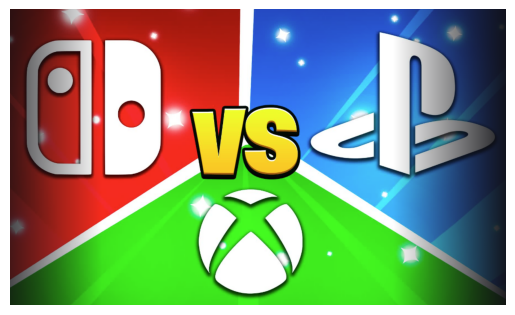

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Ruta de la imagen PNG
ruta_imagen = "/content/drive/MyDrive/DATA SCIENCE/Data science 2024 entregables/Segundo_2024/video juegos.png"

# Cargar la imagen
imagen = Image.open(ruta_imagen)

# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off')  # Ocultar ejes
plt.show()

In [ ]:
df.head() # Se realiza para conocer las columnas

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()
## Vemos el tipo de datos que tenemos. Aca vemos que hay que modificar unos float a int y viceversa que se deben modificar
## User_Score esta en Object quiero tenerlo en float64
## Year_of_Release esta como float64 lo quisiera en int64
## User_Count esta como float64 lo quisieta como int64
## Critic_Count esta como float64 lo quisiera como int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
## se descubre que hay unos errores en el dato que no son numericos, error de tipeo lo mas probable

import pandas as pd

# En este caso estamos convirtiendo los valores no numericos a NAN para poder cambiarles el formato
# Utilice el metodo de coerce para realizar el cambio
# Despues dependiendo de la necesidad, se rellenan los que se puedan rellenar y sean relevantes
# Se deben eliminar aquellos que sean relevantes y que no se puedan rellenar ya que nos afectaria


# Se llena la columna con la media de arriba y abajo
df["Year_of_Release"] = pd.to_numeric(df["Year_of_Release"], errors='coerce')
df['Year_of_Release'].fillna((df['Year_of_Release'].ffill() + df['Year_of_Release'].bfill()) / 2, inplace=True)


#################################
# Se llena la columna con la media
df["User_Score"] = pd.to_numeric(df["User_Score"], errors='coerce')
df['User_Score'].fillna(df['User_Score'].mean(), inplace=True)


##########################
# Se llena la columna con la media
df["User_Count"] = pd.to_numeric(df["User_Count"], errors='coerce')
df['User_Count'].fillna(df['User_Count'].mean(), inplace=True)

##############################################
# Se llena la columna con la media
df["Critic_Count"] = pd.to_numeric(df["Critic_Count"], errors='coerce')
df['Critic_Count'].fillna(df['Critic_Count'].mean(), inplace=True)

###########################################
# Se llena la columna con la media
df["Critic_Score"] = pd.to_numeric(df["Critic_Score"], errors='coerce')
df['Critic_Score'].fillna(df['Critic_Score'].mean(), inplace=True)

#############################################################
# En este caso se eliminan los NAN ya que en estas columnas son indispensables
df.dropna(subset=['Name', 'Publisher','Genre'], inplace=True)



In [ ]:
nan_counts = df.isna().sum()
print(nan_counts)

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6576
Rating             6720
dtype: int64


In [ ]:
## En este caso encontramos un tipo de datos que no nos es favorable, por ende se cambia el formato para uno acorde a lo necesario

df["User_Score"] = df["User_Score"].astype("float64")
df["Year_of_Release"] = df["Year_of_Release"].astype("int64")
df["User_Count"] = df["User_Count"].astype("int64")
df["Critic_Count"] = df["Critic_Count"].astype("int64")

In [ ]:
df.head() # Verificamos que se realizaron los cambios

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51,8.000000,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26,7.125046,162,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73,8.300000,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73,8.000000,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26,7.125046,162,NaN,NaN


In [ ]:
## no hay duplicados

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16714    False
16715    False
16716    False
16717    False
16718    False
Length: 16663, dtype: bool

# Pregunta 1
***
La Popularidad de un Video Juego en ciertos paises esta relacionada con las ventas en esas regiones, que pais consume mas Video Juegos y que tanto es el puntaje que se les da?

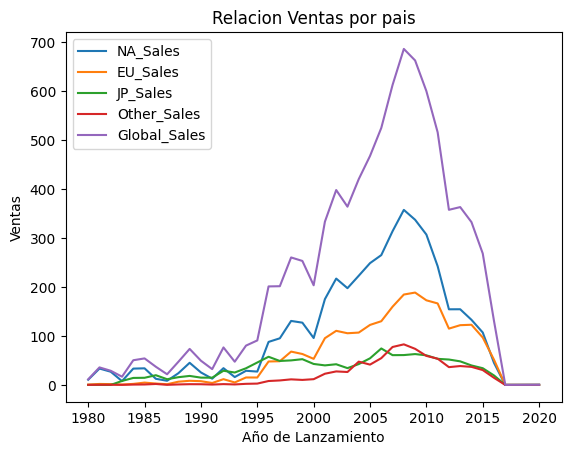

In [ ]:
# En este caso, hacemos una grafica agrupando y sumando las ventas por el año del lanzamiento

df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales","Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot()
plt.title('Relacion Ventas por pais')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas')
plt.show()


### Se puede notar claramente como USA es la region con mas consumidores de video juegos a nivel global llegando a su pick entre el año 2005 y 2010

### 2. Cual es el Top 5 de las Consolas que mas usuarios obtuvieron?

Text(0, 0.5, 'Top 5 Consolas')

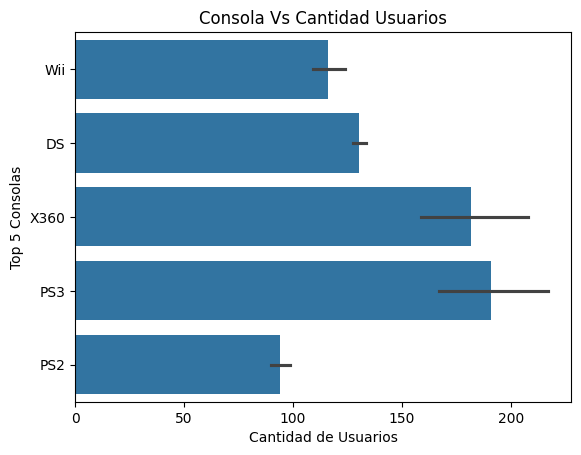

In [ ]:
top_platform = (
    df["Platform"].value_counts().sort_values(ascending = False).head(5).index.values
)
sns.barplot(
    y= "Platform",
    x= "User_Count",
    data = df[df["Platform"].isin(top_platform)]
)
plt.title('Consola Vs Cantidad Usuarios')
plt.xlabel('Cantidad de Usuarios')
plt.ylabel('Top 5 Consolas')

### En este caso, se nota que esta muy parejo entre Xbox 360 y PS3, un dato adicional es que el PS3 fue una gran consola, que se vendió hasta que sale a la venta el PS5

### 3. En cual década se han vendido mas video juegos?

In [ ]:
def get_decade (year):
  return 10 * (year // 10)

df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,decada
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51,8.000000,322,Nintendo,E,2000
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26,7.125046,162,NaN,NaN,1980
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73,8.300000,709,Nintendo,E,2000
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73,8.000000,192,Nintendo,E,2000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26,7.125046,162,NaN,NaN,1990


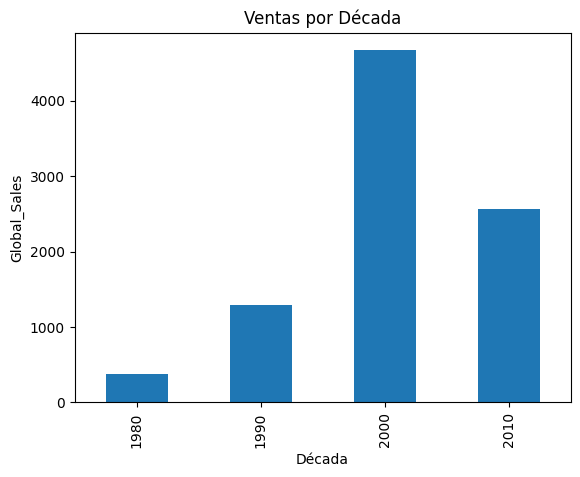

In [ ]:
# Calcular las ventas totales por década
ventas_por_decada = df.groupby('decada')['Global_Sales'].sum()

# Excluir la década de 2020
ventas_por_decada_sin_2020 = ventas_por_decada.drop(2020)

# Graficar las ventas por década
ventas_por_decada_sin_2020.plot(kind='bar', title='Ventas por Década')
plt.xlabel('Década')
plt.ylabel('Global_Sales')
plt.show()

### Se puede observar que en la decada del 2000 fue el punto mas alto, tambien creo que seguira creciendo, no coloque las ventas de la decada de 2020 ya que apenas va comenzando

### 4. Cual es el género mas vendido?

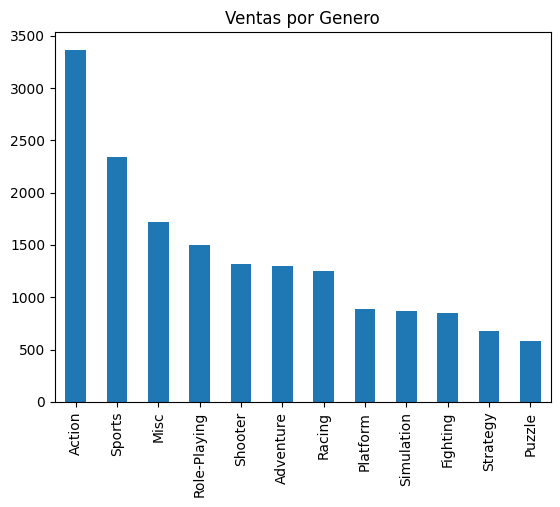

In [ ]:
df['Genre'].value_counts().plot(kind='bar',
                                    title='Ventas por Genero')
plt.show()

### A pesar de los cambios generacionales, desde que nacen los juegos de action se han mantenidos como los mas vendidos, uno de los mas famosos es Call Of Duty


### 5. Top 5 de empresas creadoras de video juegos

Text(0, 0.5, 'Top 5 Empresas')

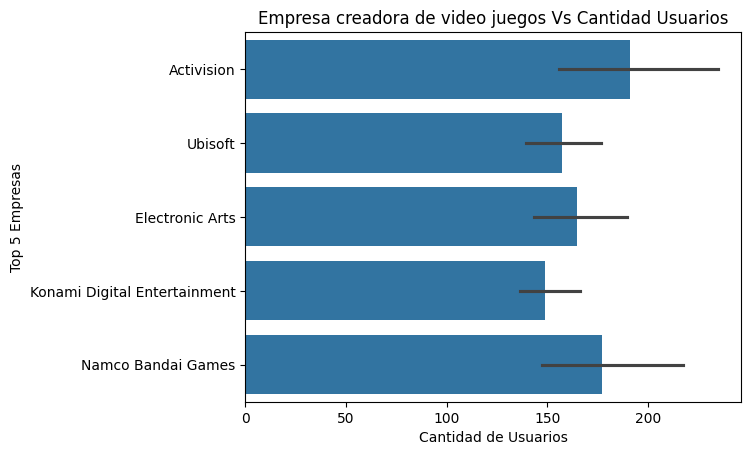

In [ ]:
top_platform = (
    df["Publisher"].value_counts().sort_values(ascending = False).head(5).index.values
)
sns.barplot(
    y= "Publisher",
    x= "User_Count",
    data = df[df["Publisher"].isin(top_platform)]
)
plt.title('Empresa creadora de video juegos Vs Cantidad Usuarios')
plt.xlabel('Cantidad de Usuarios')
plt.ylabel('Top 5 Empresas')

### Se encuentra muy parejo, pero tenemos a Activision como empresa con mas cantidad de usuarios, tomando como caracteristica juegos como COD y Crash Team Racing Nitro-Fueled y en la parre de Namco tenemos al fabuloso PACMAN

### Ahora veremos algunas correlaciones entre las medidas

<ipython-input-65-8eed1ed0ed62>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.2f', cmap='summer')


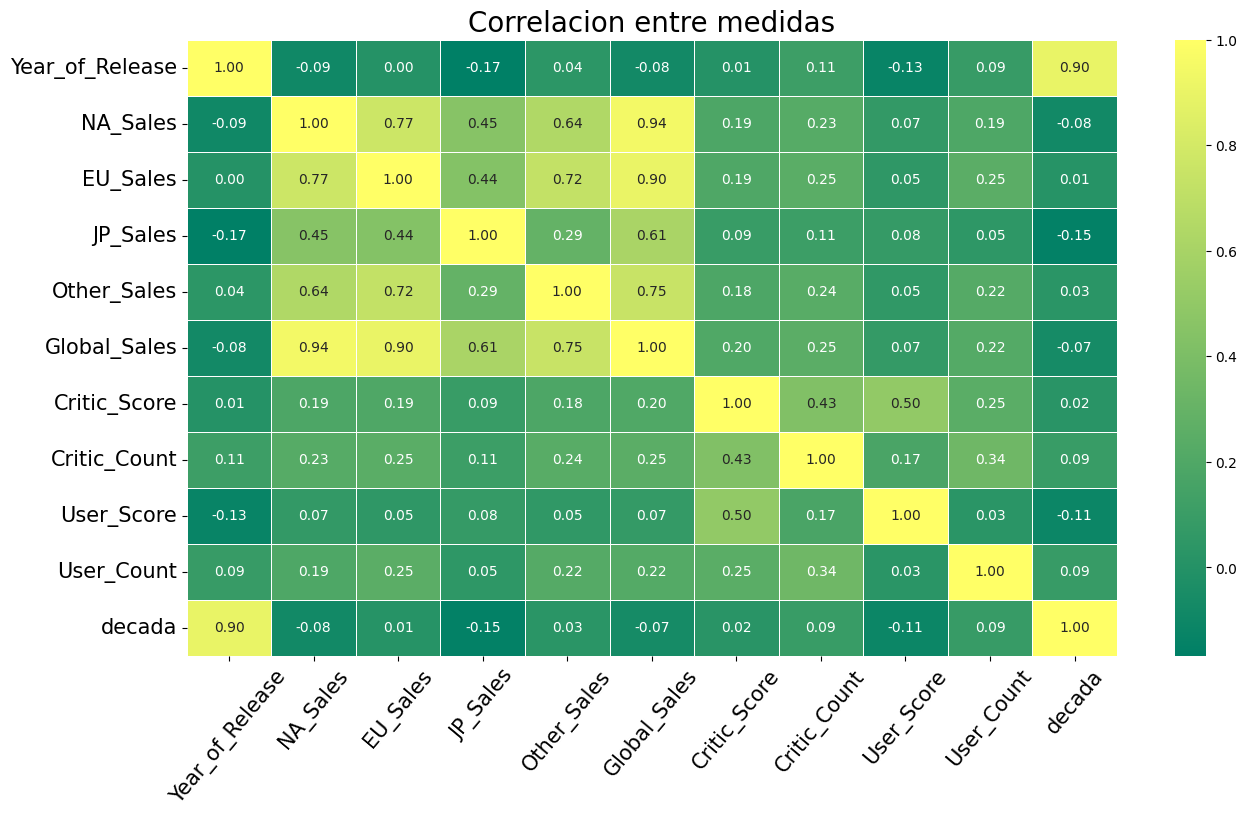

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.2f', cmap='summer')
plt.title('Correlacion entre medidas', size=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=50)
plt.show()

### Mirando el mapa de calor se puese señalar lo siguiente
### Entre las ventas muchas de ellas tienen correlacion entre si, eso lo observe un poco normal, una de las cosas que me llamaron la atencion fue la relacion entre el User_Score y el Critic_Score ya que usualmente no van de la mano lo que dicen los criticos con lo que respecta a los jugadores.



### Como conclusión se puede tomar en cuenta que estos datos estan estrechamente relacionados entre si, se puede observar que hay un auge en la tecnologia que seguira subiendo, se han implementado juegos los cuales son llamados P2E que seria Play to earn (juego para ganar) que son juegos en los cuales tienes recompensas en esos video juegos, que se podrian canjear incluso por criptomonedas.

### En este archivo se refleja como las empresas a traves de los años han competido entre si para ser las mejores y demuestra como un juego puede ser muy bueno pero si la consla no lo respalda, los criticos lo haran saber asi como los usuarios.

### Es un gran mundo que va evolucionando y seguira creciendo a medida del tiempo, creo que el metodo mas favorable a implementar seria el metodo de regresion lineal